In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

# Look the data

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Remove Nulls values
* Age ()

In [8]:
train.Age = train.Age.fillna(train.Age.mean())
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Delete columns that are useless 

Columns that are not useful in the analisis
* Name
* Ticket
* Cabin
##### "This 3 columns we are not going to use because there are unique for each row"

In [9]:
del train["Name"]
del train["Ticket"]
del train["Cabin"]

In [10]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


# Create the dummys variables

In [11]:
train_dummy = pd.get_dummies(train,columns=["Sex"])

In [12]:
train_dummy.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,22.0,1,0,7.2500,S,0,1
1,2,1,1,38.0,1,0,71.2833,C,1,0
2,3,1,3,26.0,0,0,7.9250,S,1,0
3,4,1,1,35.0,1,0,53.1000,S,1,0
4,5,0,3,35.0,0,0,8.0500,S,0,1


We are going to delete one colum of each dummy variables because are not useful

In [13]:
del train_dummy["Sex_male"]

# Look for the correlation between the columns and the price

<AxesSubplot:>

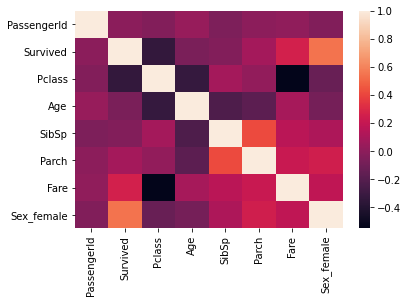

In [14]:
sns.heatmap(train_dummy.corr())

# Plotting relationship in survived and columns

Text(0.5, 0, 'Sex')

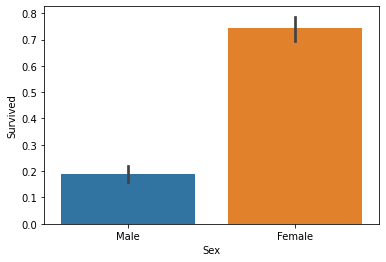

In [15]:
sex_graph = sns.barplot(x = "Sex_female", y = "Survived", data = train_dummy)
sex_graph.set(xticklabels=["Male", "Female"])
plt.xlabel("Sex")

We saw that the female are the group with the highest chance of surviving

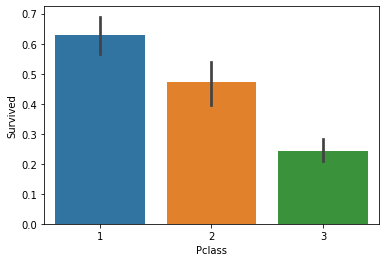

In [16]:
sex_graph = sns.barplot(x = "Pclass", y = "Survived", data = train_dummy)

In this graph we saw that the people that were in first class had most posibility of surviving

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

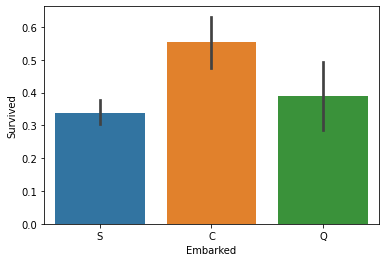

In [17]:
sns.barplot(x = "Embarked", y = "Survived", data = train_dummy)

# For the variables that have numerical x label we are going to group
* Age
* Fare

In [18]:
df = train_dummy[["Age","Survived"]]
df["Age_group"] = 0
df = df.dropna()
df.describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,Survived,Age_group
count,891.000000,891.000000,891.0
mean,29.699118,0.383838,0.0
std,13.002015,0.486592,0.0
min,0.420000,0.000000,0.0
25%,22.000000,0.000000,0.0
50%,29.699118,0.000000,0.0
75%,35.000000,1.000000,0.0
max,80.000000,1.000000,0.0


In [19]:
df.loc[df["Age"] <= 10 , "Age_group"] = 10
df.loc[(df["Age"] > 10) & (df["Age"] <= 20), "Age_group"] = 20
df.loc[(df["Age"] > 20) & (df["Age"] <= 30), "Age_group"] = 30
df.loc[(df["Age"] > 30) & (df["Age"] <= 40), "Age_group"] = 40
df.loc[(df["Age"] > 40) & (df["Age"] <= 50), "Age_group"] = 50
df.loc[(df["Age"] > 50) & (df["Age"] <= 60), "Age_group"] = 60
df.loc[(df["Age"] > 60) & (df["Age"] <= 70), "Age_group"] = 70
df.loc[(df["Age"] > 70), "Age_group"] = 80


<AxesSubplot:xlabel='Age_group', ylabel='Survived'>

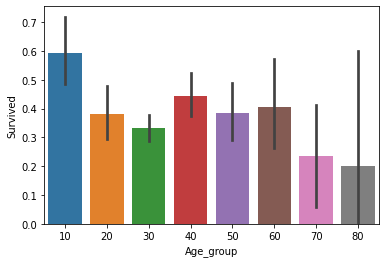

In [20]:
sns.barplot(x = "Age_group", y = "Survived", data = df)

The group that has more posibility to survived are the childs 

# Divide the labels and the columns

In [21]:
train_dummy = pd.get_dummies(train,columns=["Embarked","Sex"])
del train_dummy["Sex_male"]
del train_dummy["Embarked_S"]

In [22]:
y_train = train_dummy["Survived"]

In [23]:
del train_dummy["Survived"]
X_train = train_dummy

In [24]:
X_test = test

# Create the predicted model

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [26]:
clf = tree.DecisionTreeClassifier()

In [27]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

# Preprocesing test data
* Dummy
* Nulls
* Del columns

In [28]:
X_test = pd.get_dummies(X_test,columns=["Embarked","Sex"])
del X_test["Sex_male"]
del X_test["Embarked_S"]

In [29]:
X_test.Age = X_test.Age.fillna(X_test.Age.mean())
X_test.Fare = X_test.Fare.fillna(X_test.Fare.mean())

In [30]:
del X_test["Name"]
del X_test["Ticket"]
del X_test["Cabin"]

# Calculate the Accuracy of the model

In [31]:
Y_pred_test = clf.predict(X_test)

In [32]:
Y_pred_test.shape

(418,)

In [33]:
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [34]:
X_test.shape

(418, 9)

In [35]:
Accuracy = np.mean(submission["Survived"] == Y_pred_test)
print(Accuracy)

0.7894736842105263


In [39]:
print(f'With this model we can predict with the {round(Accuracy*100,2)}% who survived in the titanic')

With this model we can predict with the 78.95% who survived in the titanic
